In [5]:
import os

# Define the base path to your folders
folder_path = 'D:/Downloads/final-year-project/data/preprocessed_data/preprocessed_data'

# Dictionary to hold all image paths, categorized by animal species
animal_images = {}

# Walk through the directory structure
for root, dirs, files in os.walk(folder_path):
    for name in files:
        # Get the animal species from the root path
        species = os.path.basename(root)
        # Initialize a list for this species if not already done
        if species not in animal_images:
            animal_images[species] = []
        # Add the full path of the image file to the list
        full_path = os.path.join(root, name)
        animal_images[species].append(full_path)

# Check the loaded data
for species, images in animal_images.items():
    print(f"{species}: {len(images)} images")


antelope: 695 images
bat: 256 images
beaver: 133 images
bobcat: 418 images
buffalo: 606 images
chihuahua: 386 images
chimpanzee: 477 images
collie: 680 images
dalmatian: 359 images
german+shepherd: 687 images
grizzly+bear: 583 images
hippopotamus: 464 images
horse: 1111 images
killer+whale: 193 images
mole: 60 images
moose: 476 images
mouse: 124 images
otter: 519 images
ox: 501 images
persian+cat: 491 images
raccoon: 346 images
rat: 220 images
rhinoceros: 216 images


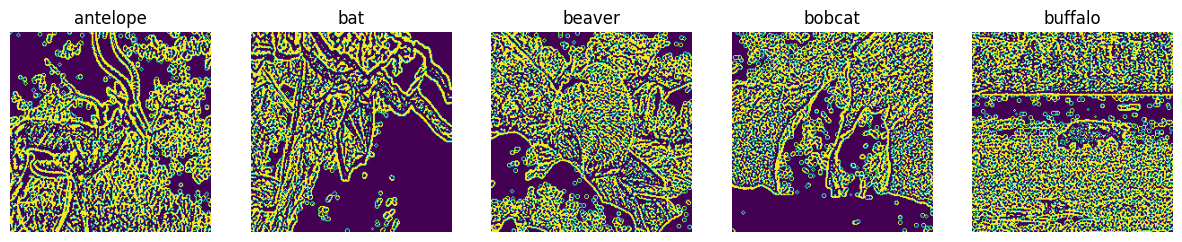

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Setup the matplotlib figure
plt.figure(figsize=(15, 10))

# Number of images to display
num_images_to_display = 5

# Iterate over the animal species and their images
for i, (species, images) in enumerate(animal_images.items()):
    if i >= num_images_to_display:
        break
    # Load an image
    img = Image.open(images[0])
    
    # Add a subplot for each image
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(img)
    plt.title(species)
    plt.axis('off')

# Show the plot
plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Define the image size and batch size
IMG_SIZE = 224  # EfficientNetB0 expects (224, 224)
BATCH_SIZE = 32

# Load and prepare images
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image /= 255.0  # Normalize to [0, 1] range
    return image.numpy()  # Convert to numpy array here

# Prepare image data and labels
all_images = []
all_labels = []

for label, images in animal_images.items():
    for image_path in images:
        image = load_and_preprocess_image(image_path)
        all_images.append(image)
        all_labels.append(label)

# Convert lists to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Encode labels to integers
label_to_index = dict((name, index) for index, name in enumerate(set(all_labels)))
all_labels = np.array([label_to_index[label] for label in all_labels])

# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)


In [9]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load the base model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(label_to_index), activation='softmax')(x)

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


16705208/16705208 [==============================] - 3s 0us/step


In [10]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=BATCH_SIZE)


Epoch 1/10
